# Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Pre-processing

In [2]:
file_path = "./data/features_3_sec.csv"

Load the dataset and pre-process the dataset:

In [3]:
df = pd.read_csv(file_path)
df= df.drop(['filename', 'length'], axis=1)
dtypes = {col:np.float32 for col in df.columns}
dtypes["label"] = "category"
df = df.astype(dtypes)

## Data Normalization

In [4]:
df_num = df.select_dtypes(include='number')
mean = df_num.mean()
std = df_num.std()
df_norm = (df_num - mean) / std
df[df_norm.columns] = df_norm

Check the results:

In [5]:
df.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,...,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03,9.990000e+03
mean,2.902072e-07,-1.741243e-07,-1.588503e-07,7.637031e-08,2.527858e-07,-4.887700e-08,-6.567847e-08,-4.276738e-08,-4.123997e-08,-1.221925e-08,...,-1.374666e-08,1.344117e-07,3.360294e-08,9.469919e-08,3.818516e-10,3.360294e-08,-3.818516e-08,1.191377e-07,1.374666e-08,-4.887700e-08
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,...,1.000000e+00,9.999999e-01,9.999999e-01,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,9.999999e-01,1.000000e+00
min,-3.011374e+00,-7.215329e+00,-1.895176e+00,-7.464086e-01,-2.296273e+00,-9.560801e-01,-3.203473e+00,-1.155274e+00,-2.379771e+00,-1.092820e+00,...,-4.934179e+00,-1.412862e+00,-4.158801e+00,-1.382892e+00,-4.144461e+00,-1.284838e+00,-4.881090e+00,-1.248231e+00,-6.609836e+00,-1.228151e+00
25%,-7.056427e-01,-5.233409e-01,-6.867999e-01,-5.750171e-01,-7.561762e-01,-6.747140e-01,-6.507812e-01,-6.857945e-01,-7.233364e-01,-7.178998e-01,...,-6.409107e-01,-5.923980e-01,-6.610471e-01,-6.071125e-01,-6.285243e-01,-5.985955e-01,-6.332051e-01,-5.886019e-01,-5.876163e-01,-5.880443e-01
50%,5.755606e-02,2.405317e-02,-1.401362e-01,-3.305054e-01,1.251420e-02,-3.485423e-01,-1.987742e-02,-2.793317e-01,3.976777e-02,-3.146979e-01,...,2.333510e-03,-2.405830e-01,-4.303296e-02,-2.628843e-01,-1.191031e-03,-2.791586e-01,-4.011522e-02,-2.774650e-01,-2.157812e-02,-2.797003e-01
75%,6.953930e-01,6.450537e-01,6.633359e-01,1.267490e-01,6.827897e-01,3.350677e-01,6.379549e-01,3.975931e-01,6.245536e-01,4.254384e-01,...,6.454080e-01,2.696025e-01,6.115077e-01,2.668691e-01,6.077207e-01,2.500203e-01,5.891373e-01,2.489987e-01,5.966193e-01,2.344276e-01
max,4.089356e+00,3.744895e+00,4.547463e+00,8.349677e+00,4.300418e+00,1.006392e+01,2.696974e+00,1.101989e+01,2.997061e+00,7.623491e+00,...,6.572831e+00,1.840569e+01,6.736832e+00,1.311516e+01,6.992508e+00,1.512008e+01,6.624425e+00,2.616903e+01,6.687237e+00,1.836936e+01


In [6]:
df_numpy = df.to_numpy()

## Train-validation split

In [7]:
X = df_numpy[:,:-1]
y = df_numpy[:, -1]

In [8]:
X.shape, y.shape

((9990, 57), (9990,))

Split the data into training set and validation set:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Multiclass classifier

Classses are only slightly unbalanced w.r.t. one another. This is not an issue.

In [10]:
df.groupby('label').size()

label
blues        1000
classical     998
country       997
disco         999
hiphop        998
jazz         1000
metal        1000
pop          1000
reggae       1000
rock          998
dtype: int64

In [11]:
accuracy_list = []

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

In [13]:
y_pred = gnb.predict(X_test)
accuracy = (y_test == y_pred).sum() / len(y_test)

In [14]:
accuracy_list.append(accuracy*100)
print(f"Accuracy: {accuracy:.3%}")

Accuracy: 52.803%


## Inbalanced Binary classifiers

In [15]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop','jazz', 'metal', 'pop', 'reggae', 'rock']

In [16]:
def binary_classifier(X, y, genre, test_size):
    # Pre-process label vector
    y[y != genre] = False
    y[y == genre] = True
    y = y.astype(np.bool_)
    
    # Train-validation split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # Fit the model
    gnb = GaussianNB()
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    
    # Return the accuracy
    return (y_test == y_pred).sum() / len(y_test)

In [17]:
for genre in genres:
    accuracy = binary_classifier(X, y.copy(), genre, 0.33)
    accuracy_list.append(accuracy*100)
    print(f"Genre: {genre} - Accuracy: {accuracy:.3%}")

Genre: blues - Accuracy: 72.490%
Genre: classical - Accuracy: 91.416%
Genre: country - Accuracy: 68.790%
Genre: disco - Accuracy: 68.577%
Genre: hiphop - Accuracy: 83.439%
Genre: jazz - Accuracy: 80.952%
Genre: metal - Accuracy: 84.167%
Genre: pop - Accuracy: 85.957%
Genre: reggae - Accuracy: 83.621%
Genre: rock - Accuracy: 64.453%


In [18]:
import matplotlib.pyplot as plt
def plot(x, y, title):
    fig, ax = plt.subplots(figsize=(12,6))
    sns.barplot(x=x, y=y, width=0.6, palette="winter", ax=ax)
    ax.set_title(title)
    ax.set_yticks(np.arange(0, 101, 10))
    # ax.legend()
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Classifier")
    ax.set_axisbelow(True)
    ax.grid(axis='x', visible=False)
    ax.grid(axis='y', color='gray')

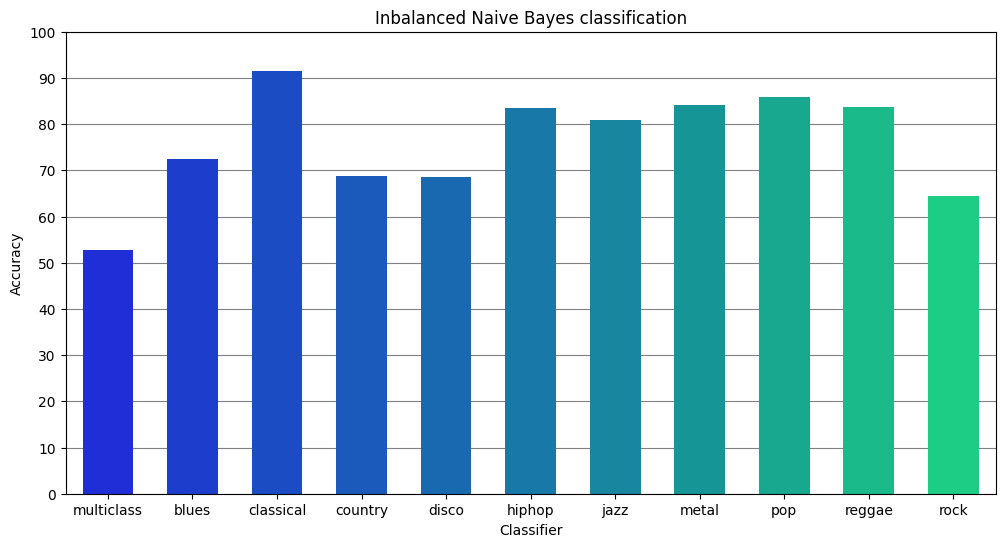

In [19]:
labels = ['multiclass'] + genres
plot(labels, accuracy_list, "Inbalanced Naive Bayes classification")

## Balanced Binary Classifiers

We want classes to have the same number of elements.

Therefore, we will randomly select samples from the other classes.

In [20]:
def balance(data, genre):
    # Split the data
    data_class = df_numpy[df_numpy[:,-1] == genre]
    data_others = df_numpy[df_numpy[:,-1] != genre]
    
    # Balance the classes
    idxs = np.random.choice(len(data_others), len(data_class))
    data_others = data_others[idxs]
    data = np.concatenate((data_class, data_others))
    
    # Return the data
    X = data[:,:-1]
    y = data[:, -1]
    return X, y

In [21]:
accuracy_list = [accuracy_list[0]]
for genre in genres:
    X, y = balance(df_numpy, genre)
    accuracy = binary_classifier(X, y, genre, 0.33)
    accuracy_list.append(accuracy*100)
    print(f"Genre: {genre} - Accuracy: {accuracy:.3%}")

Genre: blues - Accuracy: 77.879%
Genre: classical - Accuracy: 91.047%
Genre: country - Accuracy: 76.935%
Genre: disco - Accuracy: 72.879%
Genre: hiphop - Accuracy: 79.666%
Genre: jazz - Accuracy: 83.636%
Genre: metal - Accuracy: 87.424%
Genre: pop - Accuracy: 83.030%
Genre: reggae - Accuracy: 81.515%
Genre: rock - Accuracy: 68.285%


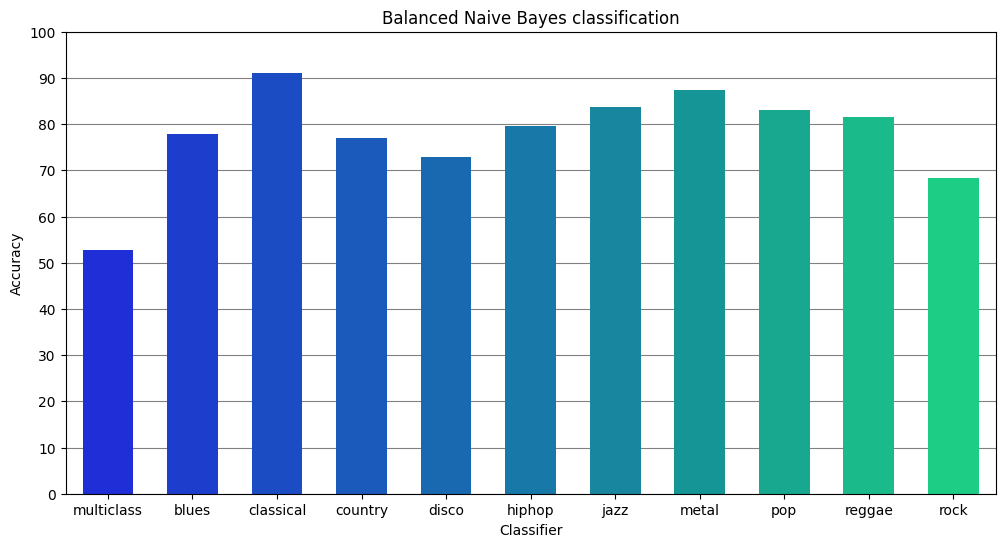

In [22]:
plot(labels, accuracy_list, "Balanced Naive Bayes classification")